# <b> <center style="background-color:DodgerBlue;"> DL Assignment 1-Group 299 </center> </b>

### Question No.1 

NLP Dataset: Dataset consisting of 20k reviews from trip advisor.

Links to an external site. (Links to an external site.) : https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews

    (6 marks)

 

Import Libraries/Dataset (0 mark)
Import the required libraries and the dataset (use Google Drive if required).
Check the GPU available (recommended- use free GPU provided by Google Colab).
 

Data Visualization (0.75 mark)
Print at least two records from each class of the dataset, for a sanity check that labels match the text.
Plot a bar graph of class distribution in the dataset. Each bar depicts the number of records belonging to a particular class in the dataset. (recommended - matplotlib/seaborn libraries)
Any other visualizations that seem appropriate for this problem are encouraged but not necessary, for the points.
Print the shapes of train and test data.
 

Data Pre-processing (0.25 mark)
Need for this Step- Since the models we use cannot accept string inputs or cannot be of the string format. We have to come up with a way of handling this step. The discussion of different ways of handling this step is out of the scope of this assignment.
Please usethis pre-trained embedding layer  (Links to an external site.) : https://tfhub.dev/google/nnlm-en-dim128/2
Links to an external site. (Links to an external site.) : https://tfhub.dev/google/nnlm-en-dim128/2
from TensorFlow hub for this assignment. This link also has a code snippet on how to convert a sentence to a vector. Refer to that for further clarity on this subject.
Bring the train and test data in the required format.
 

Model Building (0.2*5 = 1 mark)
Sequential Model layers- Use AT LEAST 5 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.
Add L1 regularization to all the layers.
Add one layer of dropout at the appropriate position and give reasons.
Choose the appropriate activation function for all the layers.
Print the model summary.   
 

Model Compilation (0.25 mark)
Compile the model with the appropriate loss function.
Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.
Use accuracy as a metric.
 

Model Training (0.5 + 0.25 = 0.75 mark)
Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.
Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training.
 

Model Evaluation (0.5 + 0.5 = 1 mark)
Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.
Print the two most incorrectly classified records for each class in the test dataset.
 

Hyperparameter Tuning- Build two more models by changing the following hyperparameters one at a time. Write the code for Model Building, Model Compilation, Model Training and Model Evaluation as given in the instructions above for each additional model. (1 + 1 = 2 marks)

Regularization: Train a model without regularization

Dropout:Change the position and value of dropout layer
Write a comparison between each model and give reasons for the difference in results.

 


#### -*- coding: utf-8 -*-
#### Indentation: Jupyter Notebook

__version__='1.0.0'
__author__="Sourav Raj, Nitin Agarwal, Anusha linda kostka j e"
__email__="2020sc04304@wilp.bits-pilani.ac.in; 2020sc04557@wilp.bits-pilani.ac.in; 2020sc04900@wilp.bits-pilani.ac.in"

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from wordcloud import WordCloud,STOPWORDS
# ANN
import keras 
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras import regularizers
import tensorflow_hub as hub
from sklearn.metrics import classification_report,confusion_matrix


In [2]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of 
                        # numbers will appear every time. 
#tf.set_random_seed(42)  # sets the graph-level random seed
tf.random.set_seed(42)

### Import data

In [3]:
data = pd.read_csv('tripadvisor_hotel_reviews.csv')
print(data.shape)
data.head(2)

(20491, 2)


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2


### Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [6]:
data.isnull().sum()
#No data Missing

Review    0
Rating    0
dtype: int64

In [8]:
data['Rating'].unique()
#Five Labels for Classification

array([4, 2, 3, 5, 1], dtype=int64)

In [10]:
#checking counts for each label
data['Rating'].value_counts()
#Maximum is 5 Min is 1

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

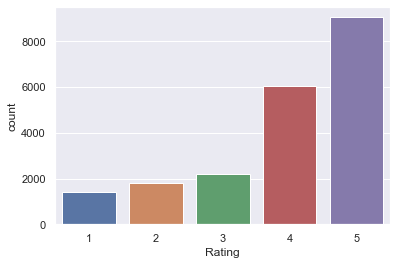

In [12]:
#Plotting Class labels on a Graph
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Rating", data=data)

<AxesSubplot:xlabel='Rating', ylabel='Density'>

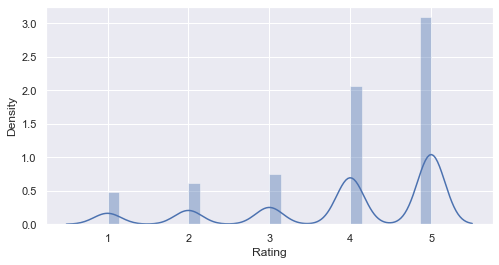

In [13]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))
sns.distplot(data['Rating'])

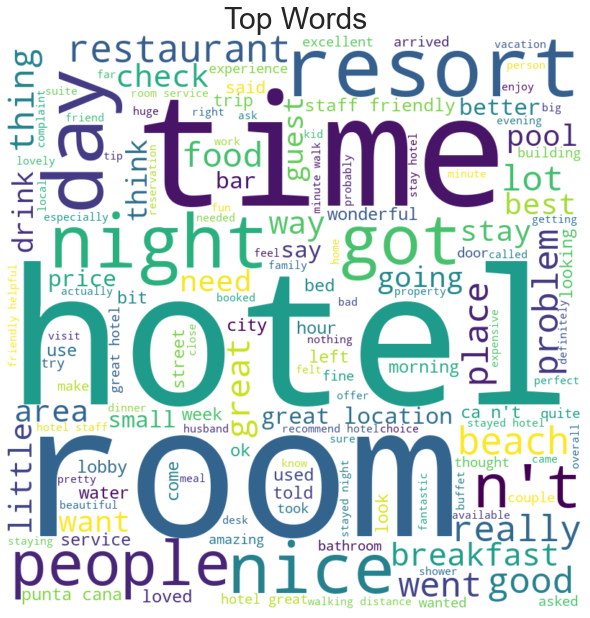

In [163]:
#Word Cloud generator for Reviews
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 12).generate(" ".join(data['Review'].values))                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Top Words",fontsize=30)
plt.show()

In [21]:
for i in range(1,6):
    print(data.loc[data['Rating'] == i].head(2))

                                               Review  Rating
15  horrible customer service hotel stay february ...       1
32  noise airconditioner-a standard, arranged stay...       1
                                               Review  Rating
1   ok nothing special charge diamond member hilto...       2
10  poor value stayed monaco seattle july, nice ho...       2
                                               Review  Rating
2   nice rooms not 4* experience hotel monaco seat...       3
13  nice hotel not nice staff hotel lovely staff q...       3
                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
7  excellent staff, housekeeping quality hotel ch...       4
                                              Review  Rating
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5


## Data Preprocessing

Splitting the data into two parts 70% for training and 30% for validation

In [167]:
Predictor=data.loc[:,['Review']].values
Target=data.loc[:,'Rating'].values

X_train, X_test, y_train, y_test = train_test_split(Predictor, Target, test_size=0.3, random_state=42, stratify=Target)
print(f'Shape of Training data is {len(X_train), len(X_train[0])}')
print(f'Shape of Testing data is {len(X_test), len(X_test[0])}')
      

Shape of Training data is (14343, 1)
Shape of Testing data is (6148, 1)


In [168]:
X_train = np.reshape(X_train,len(X_train))
X_test = np.reshape(X_test,len(X_test))
#Pre-trained text embedding

embed = hub.load("https://tfhub.dev/google/nnlm-en-dim128/2")
X_train = embed(X_train)
X_test = embed(X_test)

In [169]:
print(f'Shape of Training data is {len(X_train), len(X_train[0])}')
print(f'Shape of Testing data is {len(X_test), len(X_test[0])}')

Shape of Training data is (14343, 128)
Shape of Testing data is (6148, 128)


In [170]:
# changing the labels to arrays of hot encoding using keras utility
y_train, y_test=y_train-1, y_test-1
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)
print(y_train[0], y_test[0])

[0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.]


### Model Building

<b> learning rate: </b> The range of values to consider for the learning rate should be between 10^-6 to 1. A traditional default value for the learning rate is 0.1 or 0.01 which is a good starting point for any problem and this can be further optimize with Hyper parameter tuning. In this problem after several iteration & testing we are taking 0.001 as starting point as its convergence is faster. 

<b> Activation function: </b> As this problem is binary classification problem, we choose sigmoid in the output layer and relu in the hidden layer as its performance is better and doesn't have exploding/vanishing gradient problem. In addition we can also choose hidden layer activation function using hyper parameter tuning.

<b> loss function: </b> Binary crossentropy is used as a loss function for this problem as we have binary class at the target variable.

<b> optimizer: </b> Adam optimizer is used which generally prefer over others.

In addition variable learning rate with factor of 0.5 is used if val_loss is not improving for 10 consecutive patience. 

Early Stopping criteria is used if val_loss is not improving for 50 patience. 

Dropout layer of 0.1 is also added to avoid overfitting in the model

#### Model Iteration #1 - Baseline

As we have 128 feature, we choose 128 in the starting layer & increased to 256 for better hidden features collection and consquently to achieve better accuracy. Further we reduced the number of nodes in consequent layers to achieve lighter network architecture.

Activation function for output layer has been choosen to softmax as it is multiclass problem and for hidden layer, relu is used as it doesn't have vanishing gradient problem & its convergence is faster.

In [91]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, input_dim = 128, activation='relu'))
# The Hidden Layer :
NN_model.add(Dense(256,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(64,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dropout(rate=0.1))
NN_model.add(Dense(32,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(32,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(16,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))

# The Output Layer :
NN_model.add(Dense(5, activation='softmax'))

print(NN_model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_31 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_32 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_35 (Dense)             (None, 16)               

### Model Compilation

Learning rate: The range of values to consider for the learning rate should be between 10^-6 to 1. A traditional default value for the learning rate is 0.1 or 0.01 which is a good starting point for any problem and this can be further optimize with Hyper parameter tuning. In this problem after several iteration & testing we are taking 0.0001 as starting point as its convergence is faster. 

Optimizer: Adam is used as its performance is better as Adam realizes the benefits of both AdaGrad and RMSProp.


In [92]:
adam=Adam(learning_rate=0.0001)
NN_model.compile( optimizer = adam, loss = 'categorical_crossentropy', metrics=['accuracy'] )

### Model Training

In [93]:
start_=time.time()
print(f'Model training is started at {start_}')
NN_model_hist = NN_model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))
end_=time.time()
print(f'Model training is finished at {end_} & it took {round(end_-start_, 0)} sec')

Model training is started at 1656181888.305475
Epoch 1/200
225/225 [==============================] - 1s 6ms/step - loss: 4.6561 - accuracy: 0.3800 - val_loss: 4.0541 - val_accuracy: 0.4419
Epoch 2/200
225/225 [==============================] - 1s 5ms/step - loss: 3.5657 - accuracy: 0.4603 - val_loss: 3.1248 - val_accuracy: 0.4893
Epoch 3/200
225/225 [==============================] - 1s 5ms/step - loss: 2.7792 - accuracy: 0.5035 - val_loss: 2.4596 - val_accuracy: 0.5054
Epoch 4/200
225/225 [==============================] - 1s 5ms/step - loss: 2.2081 - accuracy: 0.5140 - val_loss: 1.9799 - val_accuracy: 0.5091
Epoch 5/200
225/225 [==============================] - 1s 5ms/step - loss: 1.8145 - accuracy: 0.5196 - val_loss: 1.6716 - val_accuracy: 0.5128
Epoch 6/200
225/225 [==============================] - 1s 5ms/step - loss: 1.5866 - accuracy: 0.5218 - val_loss: 1.5233 - val_accuracy: 0.5120
Epoch 7/200
225/225 [==============================] - 1s 5ms/step - loss: 1.4805 - accuracy: 0

Epoch 114/200
225/225 [==============================] - 2s 7ms/step - loss: 1.0063 - accuracy: 0.6061 - val_loss: 1.0861 - val_accuracy: 0.5665
Epoch 115/200
225/225 [==============================] - 2s 7ms/step - loss: 1.0056 - accuracy: 0.6064 - val_loss: 1.0861 - val_accuracy: 0.5655
Epoch 116/200
225/225 [==============================] - 2s 7ms/step - loss: 1.0030 - accuracy: 0.6083 - val_loss: 1.0872 - val_accuracy: 0.5703
Epoch 117/200
225/225 [==============================] - 2s 7ms/step - loss: 1.0015 - accuracy: 0.6051 - val_loss: 1.0861 - val_accuracy: 0.5680
Epoch 118/200
225/225 [==============================] - 2s 7ms/step - loss: 1.0014 - accuracy: 0.6065 - val_loss: 1.0873 - val_accuracy: 0.5688
Epoch 119/200
225/225 [==============================] - 1s 7ms/step - loss: 1.0010 - accuracy: 0.6103 - val_loss: 1.0876 - val_accuracy: 0.5662
Epoch 120/200
225/225 [==============================] - 2s 7ms/step - loss: 0.9976 - accuracy: 0.6125 - val_loss: 1.0866 - val_ac

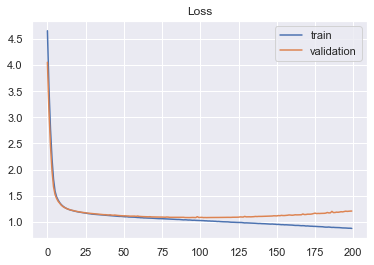

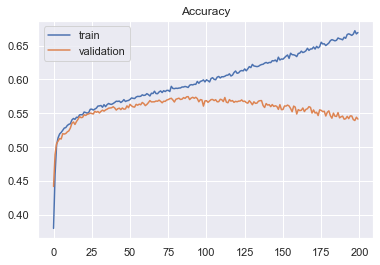

In [94]:
plt.title(f'Loss')
plt.plot(NN_model_hist.history['loss'], label='train')
plt.plot(NN_model_hist.history['val_loss'], label='validation')
plt.legend()
plt.show()
plt.title(f'Accuracy')
plt.plot(NN_model_hist.history['accuracy'], label='train')
plt.plot(NN_model_hist.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

### Model Evaluation

In [95]:
Evaluation_summary=pd.DataFrame()
print(f"Final training loss : {NN_model_hist.history['loss'][-1]}")
print(f"Final training accuracy:  {NN_model_hist.history['accuracy'][-1]}")
print(f"Final validation loss : {NN_model_hist.history['val_loss'][-1]}")
print(f"Final validation accuracy : {NN_model_hist.history['val_accuracy'][-1]}")
Evaluation_summary=Evaluation_summary.append(pd.DataFrame({ \
            'Train Loss':[NN_model_hist.history['loss'][-1]], 'Train Accuracy': [NN_model_hist.history['accuracy'][-1]], \
                'Validation Loss':[NN_model_hist.history['val_loss'][-1]], 'Validation Accuracy': [NN_model_hist.history['val_accuracy'][-1]]}), ignore_index=True)

Final training loss : 0.8758621215820312
Final training accuracy:  0.6692463159561157
Final validation loss : 1.2082183361053467
Final validation accuracy : 0.5414769053459167


In [96]:
testLoss, testAccuracy = NN_model.evaluate( X_test, y_test)

193/193 [==============================] - 0s 2ms/step - loss: 1.2082 - accuracy: 0.5415


In [103]:
y_pred = NN_model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test_=np.argmax(y_test_, axis=1)
cm=confusion_matrix(y_test_, y_pred)
print(f'Confusion matrix:')
print(cm)
print(f'Classification Report:')
clReport=classification_report(y_test_, y_pred)
print(clReport)

Confusion matrix:
[[ 255  104   25   23   19]
 [ 135  162   96  107   38]
 [  30  105  122  308   90]
 [  15   47  139  881  730]
 [   3   36   65  704 1909]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       426
           1       0.36      0.30      0.33       538
           2       0.27      0.19      0.22       655
           3       0.44      0.49      0.46      1812
           4       0.69      0.70      0.69      2717

    accuracy                           0.54      6148
   macro avg       0.47      0.45      0.46      6148
weighted avg       0.53      0.54      0.54      6148



From Classification Report we can say that class 4 means Reviews with rating 5 is performing quite well as its f1-score, precision & recall is quite good where as class 2 i.e. review with rating 3 has worst performance.

### HyperParameter Tuning

#### Model Iteration #2
#### Regularization: Train a model without regularization

In [137]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, input_dim = 128, activation='relu'))
# The Hidden Layer :
NN_model.add(Dense(256,activation='relu'))
NN_model.add(Dense(64,activation='relu'))
NN_model.add(Dropout(rate=0.1))
NN_model.add(Dense(32,activation='relu'))
NN_model.add(Dense(32,activation='relu'))
NN_model.add(Dense(16,activation='relu'))

# The Output Layer :
NN_model.add(Dense(5, activation='softmax'))

print(NN_model.summary())

### Model Compilation

adam=Adam(learning_rate=0.0001)
NN_model.compile( optimizer = adam, loss = 'categorical_crossentropy', metrics=['accuracy'] )

### Model Training

start_=time.time()
print(f'Model training is started at {start_}')
NN_model_hist = NN_model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))
end_=time.time()
print(f'Model training is finished at {end_} & it took {round(end_-start_, 0)} sec')



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_31 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_32 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_35 (Dense)             (None, 16)               

Epoch 104/200
225/225 [==============================] - 1s 4ms/step - loss: 0.6254 - accuracy: 0.7342 - val_loss: 1.2594 - val_accuracy: 0.5346
Epoch 105/200
225/225 [==============================] - 1s 4ms/step - loss: 0.6193 - accuracy: 0.7365 - val_loss: 1.2899 - val_accuracy: 0.5340
Epoch 106/200
225/225 [==============================] - 1s 4ms/step - loss: 0.6134 - accuracy: 0.7405 - val_loss: 1.3169 - val_accuracy: 0.5153
Epoch 107/200
225/225 [==============================] - 1s 4ms/step - loss: 0.6092 - accuracy: 0.7391 - val_loss: 1.2985 - val_accuracy: 0.5337
Epoch 108/200
225/225 [==============================] - 1s 4ms/step - loss: 0.5979 - accuracy: 0.7458 - val_loss: 1.3242 - val_accuracy: 0.5174
Epoch 109/200
225/225 [==============================] - 1s 4ms/step - loss: 0.5961 - accuracy: 0.7495 - val_loss: 1.3327 - val_accuracy: 0.5319
Epoch 110/200
225/225 [==============================] - 1s 4ms/step - loss: 0.5950 - accuracy: 0.7505 - val_loss: 1.3329 - val_ac

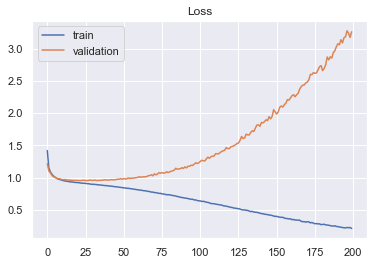

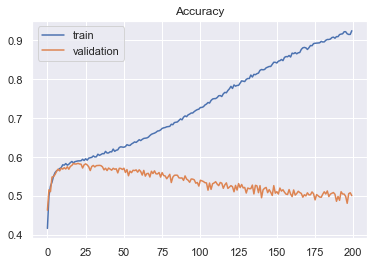

In [140]:
plt.title(f'Loss')
plt.plot(NN_model_hist.history['loss'], label='train')
plt.plot(NN_model_hist.history['val_loss'], label='validation')
plt.legend()
plt.show()
plt.title(f'Accuracy')
plt.plot(NN_model_hist.history['accuracy'], label='train')
plt.plot(NN_model_hist.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [141]:


### Model Evaluation

Evaluation_summary=pd.DataFrame()
print(f"Final training loss : {NN_model_hist.history['loss'][-1]}")
print(f"Final training accuracy:  {NN_model_hist.history['accuracy'][-1]}")
print(f"Final validation loss : {NN_model_hist.history['val_loss'][-1]}")
print(f"Final validation accuracy : {NN_model_hist.history['val_accuracy'][-1]}")
Evaluation_summary=Evaluation_summary.append(pd.DataFrame({ \
            'Train Loss':[NN_model_hist.history['loss'][-1]], 'Train Accuracy': [NN_model_hist.history['accuracy'][-1]], \
                'Validation Loss':[NN_model_hist.history['val_loss'][-1]], 'Validation Accuracy': [NN_model_hist.history['val_accuracy'][-1]]}), ignore_index=True)

testLoss, testAccuracy = NN_model.evaluate(X_test, y_test)

y_pred = NN_model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test_=np.argmax(y_test, axis=1)
cm=confusion_matrix(y_test_, y_pred)
print(f'Confusion matrix:')
print(cm)
print(f'Classification Report:')
clReport=classification_report(y_test_, y_pred)
print(clReport)

Final training loss : 0.2121506631374359
Final training accuracy:  0.9248414039611816
Final validation loss : 3.2611422538757324
Final validation accuracy : 0.5013012290000916
193/193 [==============================] - 0s 2ms/step - loss: 3.2611 - accuracy: 0.5013
Confusion matrix:
[[ 225  123   38   30   10]
 [ 122  178   87  106   45]
 [  32  101  165  229  128]
 [  16   66  224  736  770]
 [  12   53  140  734 1778]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.53      0.54       426
           1       0.34      0.33      0.34       538
           2       0.25      0.25      0.25       655
           3       0.40      0.41      0.40      1812
           4       0.65      0.65      0.65      2717

    accuracy                           0.50      6148
   macro avg       0.44      0.43      0.44      6148
weighted avg       0.50      0.50      0.50      6148



Observation: Without regularization the model validation fails significantly.

#### Model Iteration #3
#### Dropout:Change the position and value of dropout layer. Re-introducing regularization.

In [143]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, input_dim = 128, activation='relu'))
# The Hidden Layer :
NN_model.add(Dense(256,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(64,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))

NN_model.add(Dense(32,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(32,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dropout(rate=0.5))
NN_model.add(Dense(16,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))

# The Output Layer :
NN_model.add(Dense(5, activation='softmax'))

print(NN_model.summary())

### Model Compilation

adam=Adam(learning_rate=0.0001)
NN_model.compile( optimizer = adam, loss = 'categorical_crossentropy', metrics=['accuracy'] )

### Model Training

start_=time.time()
print(f'Model training is started at {start_}')
NN_model_hist = NN_model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))
end_=time.time()
print(f'Model training is finished at {end_} & it took {round(end_-start_, 0)} sec')




Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_38 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_39 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_40 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_41 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 16)               

Epoch 48/200
225/225 [==============================] - 2s 7ms/step - loss: 1.1189 - accuracy: 0.5477 - val_loss: 1.1120 - val_accuracy: 0.5462
Epoch 49/200
225/225 [==============================] - 2s 7ms/step - loss: 1.1198 - accuracy: 0.5492 - val_loss: 1.1085 - val_accuracy: 0.5468
Epoch 50/200
225/225 [==============================] - 1s 7ms/step - loss: 1.1188 - accuracy: 0.5454 - val_loss: 1.1080 - val_accuracy: 0.5459
Epoch 51/200
225/225 [==============================] - 2s 7ms/step - loss: 1.1160 - accuracy: 0.5456 - val_loss: 1.1067 - val_accuracy: 0.5491
Epoch 52/200
225/225 [==============================] - 2s 7ms/step - loss: 1.1140 - accuracy: 0.5460 - val_loss: 1.1070 - val_accuracy: 0.5457
Epoch 53/200
225/225 [==============================] - 2s 7ms/step - loss: 1.1163 - accuracy: 0.5441 - val_loss: 1.1052 - val_accuracy: 0.5452
Epoch 54/200
225/225 [==============================] - 2s 7ms/step - loss: 1.1111 - accuracy: 0.5449 - val_loss: 1.1048 - val_accuracy:

Epoch 105/200
225/225 [==============================] - 2s 7ms/step - loss: 1.0514 - accuracy: 0.5669 - val_loss: 1.0865 - val_accuracy: 0.5449
Epoch 106/200
225/225 [==============================] - 2s 8ms/step - loss: 1.0525 - accuracy: 0.5694 - val_loss: 1.0867 - val_accuracy: 0.5465
Epoch 107/200
225/225 [==============================] - 2s 7ms/step - loss: 1.0469 - accuracy: 0.5714 - val_loss: 1.0906 - val_accuracy: 0.5486
Epoch 108/200
225/225 [==============================] - 2s 8ms/step - loss: 1.0481 - accuracy: 0.5681 - val_loss: 1.0932 - val_accuracy: 0.5473
Epoch 109/200
225/225 [==============================] - 2s 7ms/step - loss: 1.0489 - accuracy: 0.5699 - val_loss: 1.0885 - val_accuracy: 0.5434
Epoch 110/200
225/225 [==============================] - 2s 7ms/step - loss: 1.0443 - accuracy: 0.5721 - val_loss: 1.0876 - val_accuracy: 0.5459
Epoch 111/200
225/225 [==============================] - 2s 7ms/step - loss: 1.0467 - accuracy: 0.5718 - val_loss: 1.0892 - val_ac

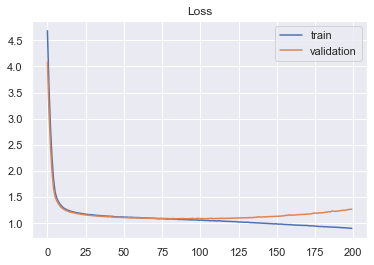

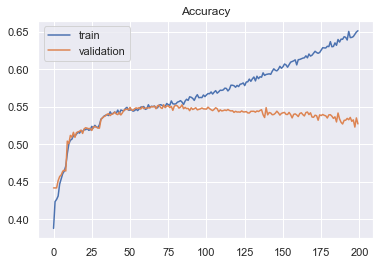

In [144]:

plt.title(f'Loss')
plt.plot(NN_model_hist.history['loss'], label='train')
plt.plot(NN_model_hist.history['val_loss'], label='validation')
plt.legend()
plt.show()
plt.title(f'Accuracy')
plt.plot(NN_model_hist.history['accuracy'], label='train')
plt.plot(NN_model_hist.history['val_accuracy'], label='validation')
plt.legend()
plt.show()


In [145]:
### Model Evaluation

Evaluation_summary=pd.DataFrame()
print(f"Final training loss : {NN_model_hist.history['loss'][-1]}")
print(f"Final training accuracy:  {NN_model_hist.history['accuracy'][-1]}")
print(f"Final validation loss : {NN_model_hist.history['val_loss'][-1]}")
print(f"Final validation accuracy : {NN_model_hist.history['val_accuracy'][-1]}")

Evaluation_summary=Evaluation_summary.append(pd.DataFrame({ \
            'Train Loss':[NN_model_hist.history['loss'][-1]], 'Train Accuracy': [NN_model_hist.history['accuracy'][-1]], \
                'Validation Loss':[NN_model_hist.history['val_loss'][-1]], 'Validation Accuracy': [NN_model_hist.history['val_accuracy'][-1]]}), ignore_index=True)

testLoss, testAccuracy = NN_model.evaluate(X_test, y_test)

y_pred = NN_model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test_=np.argmax(y_test, axis=1)
cm=confusion_matrix(y_test_, y_pred)
print(f'Confusion matrix:')
print(cm)
print(f'Classification Report:')
clReport=classification_report(y_test_, y_pred)
print(clReport)

Final training loss : 0.8996031284332275
Final training accuracy:  0.6511887311935425
Final validation loss : 1.2685205936431885
Final validation accuracy : 0.5271633267402649
193/193 [==============================] - 1s 3ms/step - loss: 1.2685 - accuracy: 0.5272
Confusion matrix:
[[ 298   59   28   37    4]
 [ 195  117   73  129   24]
 [  56  108  120  289   82]
 [  35   80  145  766  786]
 [  15   53   64  645 1940]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.70      0.58       426
           1       0.28      0.22      0.25       538
           2       0.28      0.18      0.22       655
           3       0.41      0.42      0.42      1812
           4       0.68      0.71      0.70      2717

    accuracy                           0.53      6148
   macro avg       0.43      0.45      0.43      6148
weighted avg       0.51      0.53      0.52      6148



Observation: Results have improved over previous iteration, validation is still failing.

#### Model Iteration #4
#### Dropout:Change the position to lower hidden layer and value of dropout layer. 
#### Learning rate: reduce the learning rate

In [135]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, input_dim = 128, activation='relu'))
# The Hidden Layer :
NN_model.add(Dense(256,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dropout(rate=0.7))
NN_model.add(Dense(64,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dropout(rate=0.7))
NN_model.add(Dense(32,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(32,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(16,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))

# The Output Layer :
NN_model.add(Dense(5, activation='softmax'))

print(NN_model.summary())

### Model Compilation

adam=Adam(learning_rate=0.00005)
NN_model.compile( optimizer = adam, loss = 'categorical_crossentropy', metrics=['accuracy'] )

### Model Training

start_=time.time()
print(f'Model training is started at {start_}')
NN_model_hist = NN_model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))
end_=time.time()
print(f'Model training is finished at {end_} & it took {round(end_-start_, 0)} sec')



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_24 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_27 (Dense)             (None, 32)               

Epoch 47/200
225/225 [==============================] - 2s 7ms/step - loss: 1.2775 - accuracy: 0.5102 - val_loss: 1.2557 - val_accuracy: 0.5063
Epoch 48/200
225/225 [==============================] - 2s 7ms/step - loss: 1.2733 - accuracy: 0.5137 - val_loss: 1.2534 - val_accuracy: 0.5067
Epoch 49/200
225/225 [==============================] - 2s 7ms/step - loss: 1.2736 - accuracy: 0.5127 - val_loss: 1.2470 - val_accuracy: 0.5026
Epoch 50/200
225/225 [==============================] - 2s 7ms/step - loss: 1.2697 - accuracy: 0.5108 - val_loss: 1.2449 - val_accuracy: 0.5054
Epoch 51/200
225/225 [==============================] - 2s 8ms/step - loss: 1.2646 - accuracy: 0.5117 - val_loss: 1.2411 - val_accuracy: 0.5013
Epoch 52/200
225/225 [==============================] - 2s 7ms/step - loss: 1.2640 - accuracy: 0.5137 - val_loss: 1.2398 - val_accuracy: 0.5067
Epoch 53/200
225/225 [==============================] - 2s 7ms/step - loss: 1.2645 - accuracy: 0.5128 - val_loss: 1.2362 - val_accuracy:

Epoch 104/200
225/225 [==============================] - 2s 7ms/step - loss: 1.1932 - accuracy: 0.5166 - val_loss: 1.1739 - val_accuracy: 0.5098
Epoch 105/200
225/225 [==============================] - 2s 7ms/step - loss: 1.1971 - accuracy: 0.5159 - val_loss: 1.1733 - val_accuracy: 0.5091
Epoch 106/200
225/225 [==============================] - 1s 7ms/step - loss: 1.1995 - accuracy: 0.5164 - val_loss: 1.1731 - val_accuracy: 0.5098
Epoch 107/200
225/225 [==============================] - 2s 7ms/step - loss: 1.1967 - accuracy: 0.5174 - val_loss: 1.1731 - val_accuracy: 0.5122
Epoch 108/200
225/225 [==============================] - 1s 7ms/step - loss: 1.1979 - accuracy: 0.5178 - val_loss: 1.1726 - val_accuracy: 0.5125
Epoch 109/200
225/225 [==============================] - 2s 7ms/step - loss: 1.1953 - accuracy: 0.5168 - val_loss: 1.1712 - val_accuracy: 0.5111
Epoch 110/200
225/225 [==============================] - 2s 7ms/step - loss: 1.1963 - accuracy: 0.5187 - val_loss: 1.1709 - val_ac

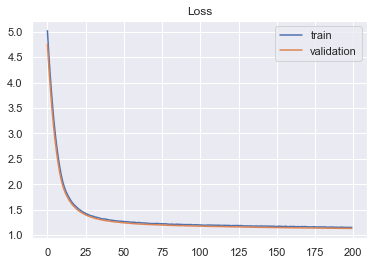

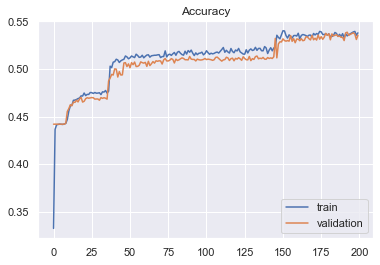

Final training loss : 1.15363347530365
Final training accuracy:  0.5380324721336365
Final validation loss : 1.1320735216140747
Final validation accuracy : 0.5354586839675903
193/193 [==============================] - 1s 3ms/step - loss: 1.1321 - accuracy: 0.5355
Confusion matrix:
[[ 315   53    0   52    6]
 [ 216  115    0  170   37]
 [  81   67    0  324  183]
 [  26   57    0  492 1237]
 [  11   16    0  320 2370]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.74      0.59       426
           1       0.37      0.21      0.27       538
           2       0.00      0.00      0.00       655
           3       0.36      0.27      0.31      1812
           4       0.62      0.87      0.72      2717

    accuracy                           0.54      6148
   macro avg       0.37      0.42      0.38      6148
weighted avg       0.45      0.54      0.48      6148



In [136]:
plt.title(f'Loss')
plt.plot(NN_model_hist.history['loss'], label='train')
plt.plot(NN_model_hist.history['val_loss'], label='validation')
plt.legend()
plt.show()
plt.title(f'Accuracy')
plt.plot(NN_model_hist.history['accuracy'], label='train')
plt.plot(NN_model_hist.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

### Model Evaluation

Evaluation_summary=pd.DataFrame()
print(f"Final training loss : {NN_model_hist.history['loss'][-1]}")
print(f"Final training accuracy:  {NN_model_hist.history['accuracy'][-1]}")
print(f"Final validation loss : {NN_model_hist.history['val_loss'][-1]}")
print(f"Final validation accuracy : {NN_model_hist.history['val_accuracy'][-1]}")
Evaluation_summary=Evaluation_summary.append(pd.DataFrame({ \
            'Train Loss':[NN_model_hist.history['loss'][-1]], 'Train Accuracy': [NN_model_hist.history['accuracy'][-1]], \
                'Validation Loss':[NN_model_hist.history['val_loss'][-1]], 'Validation Accuracy': [NN_model_hist.history['val_accuracy'][-1]]}), ignore_index=True)

testLoss, testAccuracy = NN_model.evaluate(X_test, y_test)

y_pred = NN_model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test_=np.argmax(y_test, axis=1)
cm=confusion_matrix(y_test_, y_pred)
print(f'Confusion matrix:')
print(cm)
print(f'Classification Report:')
clReport=classification_report(y_test_, y_pred)
print(clReport)

Obseravation: Significant improvements in validation. There is not much improvement in accuracy. Also the Rating "3" is showing 0 which is an issue with the model.

#### Model Iteration #5
#### Decreasing Dropout value. Adding one more layer.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 32)               

Epoch 46/200
225/225 [==============================] - 2s 7ms/step - loss: 1.2198 - accuracy: 0.5182 - val_loss: 1.2056 - val_accuracy: 0.5094
Epoch 47/200
225/225 [==============================] - 2s 7ms/step - loss: 1.2225 - accuracy: 0.5160 - val_loss: 1.2039 - val_accuracy: 0.5158
Epoch 48/200
225/225 [==============================] - 2s 7ms/step - loss: 1.2174 - accuracy: 0.5187 - val_loss: 1.2024 - val_accuracy: 0.5176
Epoch 49/200
225/225 [==============================] - 2s 7ms/step - loss: 1.2161 - accuracy: 0.5186 - val_loss: 1.1966 - val_accuracy: 0.5132
Epoch 50/200
225/225 [==============================] - 2s 7ms/step - loss: 1.2148 - accuracy: 0.5184 - val_loss: 1.1945 - val_accuracy: 0.5138
Epoch 51/200
225/225 [==============================] - 2s 7ms/step - loss: 1.2093 - accuracy: 0.5189 - val_loss: 1.1925 - val_accuracy: 0.5137
Epoch 52/200
225/225 [==============================] - 2s 7ms/step - loss: 1.2063 - accuracy: 0.5201 - val_loss: 1.1906 - val_accuracy:

Epoch 103/200
225/225 [==============================] - 2s 8ms/step - loss: 1.1482 - accuracy: 0.5280 - val_loss: 1.1389 - val_accuracy: 0.5247
Epoch 104/200
225/225 [==============================] - 2s 8ms/step - loss: 1.1445 - accuracy: 0.5295 - val_loss: 1.1385 - val_accuracy: 0.5262
Epoch 105/200
225/225 [==============================] - 2s 8ms/step - loss: 1.1451 - accuracy: 0.5269 - val_loss: 1.1380 - val_accuracy: 0.5234
Epoch 106/200
225/225 [==============================] - 2s 8ms/step - loss: 1.1457 - accuracy: 0.5269 - val_loss: 1.1377 - val_accuracy: 0.5250
Epoch 107/200
225/225 [==============================] - 2s 8ms/step - loss: 1.1450 - accuracy: 0.5414 - val_loss: 1.1370 - val_accuracy: 0.5449
Epoch 108/200
225/225 [==============================] - 2s 8ms/step - loss: 1.1460 - accuracy: 0.5420 - val_loss: 1.1363 - val_accuracy: 0.5446
Epoch 109/200
225/225 [==============================] - 2s 8ms/step - loss: 1.1450 - accuracy: 0.5461 - val_loss: 1.1356 - val_ac

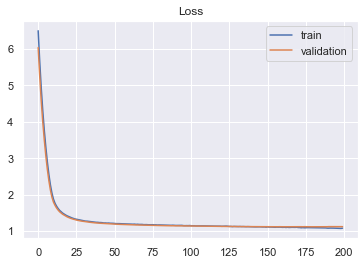

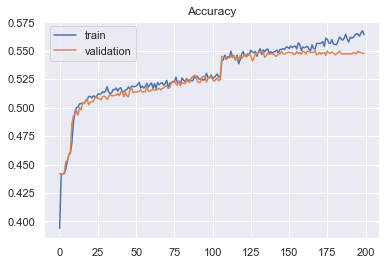

Final training loss : 1.0814673900604248
Final training accuracy:  0.5639684796333313
Final validation loss : 1.1236680746078491
Final validation accuracy : 0.5474951267242432
193/193 [==============================] - 1s 3ms/step - loss: 1.1237 - accuracy: 0.5475
Confusion matrix:
[[ 315   62    2   43    4]
 [ 213  127    2  174   22]
 [  72   98    2  374  109]
 [  24   66    5  754  963]
 [  14   30    2  503 2168]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.74      0.59       426
           1       0.33      0.24      0.28       538
           2       0.15      0.00      0.01       655
           3       0.41      0.42      0.41      1812
           4       0.66      0.80      0.72      2717

    accuracy                           0.55      6148
   macro avg       0.41      0.44      0.40      6148
weighted avg       0.49      0.55      0.51      6148



In [132]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, input_dim = 128, activation='relu'))
# The Hidden Layer :
NN_model.add(Dense(256,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(128,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dropout(rate=0.5))
NN_model.add(Dense(64,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dropout(rate=0.5))
NN_model.add(Dense(32,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(32,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(16,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))

# The Output Layer :
NN_model.add(Dense(5, activation='softmax'))

print(NN_model.summary())

### Model Compilation

adam=Adam(learning_rate=0.00005)
NN_model.compile( optimizer = adam, loss = 'categorical_crossentropy', metrics=['accuracy'] )

### Model Training

start_=time.time()
print(f'Model training is started at {start_}')
NN_model_hist = NN_model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))
end_=time.time()
print(f'Model training is finished at {end_} & it took {round(end_-start_, 0)} sec')



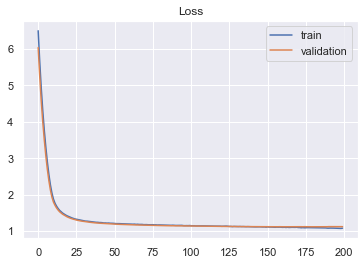

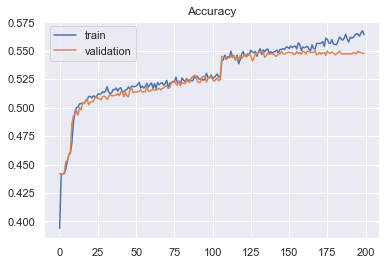

Final training loss : 1.0814673900604248
Final training accuracy:  0.5639684796333313
Final validation loss : 1.1236680746078491
Final validation accuracy : 0.5474951267242432


In [133]:
plt.title(f'Loss')
plt.plot(NN_model_hist.history['loss'], label='train')
plt.plot(NN_model_hist.history['val_loss'], label='validation')
plt.legend()
plt.show()
plt.title(f'Accuracy')
plt.plot(NN_model_hist.history['accuracy'], label='train')
plt.plot(NN_model_hist.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

### Model Evaluation

Evaluation_summary=pd.DataFrame()
print(f"Final training loss : {NN_model_hist.history['loss'][-1]}")
print(f"Final training accuracy:  {NN_model_hist.history['accuracy'][-1]}")
print(f"Final validation loss : {NN_model_hist.history['val_loss'][-1]}")
print(f"Final validation accuracy : {NN_model_hist.history['val_accuracy'][-1]}")


In [134]:
Evaluation_summary=Evaluation_summary.append(pd.DataFrame({ \
            'Train Loss':[NN_model_hist.history['loss'][-1]], 'Train Accuracy': [NN_model_hist.history['accuracy'][-1]], \
                'Validation Loss':[NN_model_hist.history['val_loss'][-1]], 'Validation Accuracy': [NN_model_hist.history['val_accuracy'][-1]]}), ignore_index=True)

testLoss, testAccuracy = NN_model.evaluate(X_test, y_test)

y_pred = NN_model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test_=np.argmax(y_test, axis=1)
cm=confusion_matrix(y_test_, y_pred)
print(f'Confusion matrix:')
print(cm)
print(f'Classification Report:')
clReport=classification_report(y_test_, y_pred)
print(clReport)

193/193 [==============================] - 0s 3ms/step - loss: 1.1237 - accuracy: 0.5475
Confusion matrix:
[[ 315   62    2   43    4]
 [ 213  127    2  174   22]
 [  72   98    2  374  109]
 [  24   66    5  754  963]
 [  14   30    2  503 2168]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.74      0.59       426
           1       0.33      0.24      0.28       538
           2       0.15      0.00      0.01       655
           3       0.41      0.42      0.41      1812
           4       0.66      0.80      0.72      2717

    accuracy                           0.55      6148
   macro avg       0.41      0.44      0.40      6148
weighted avg       0.49      0.55      0.51      6148



Observation: This iteration improves the accuracy marginally. F1 score for rating '5' is good. However rating '3' is an issue.

#### Model Iteration #6
#### Removing one dropout layer. Reducing the learning rate marginally. 

In [146]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, input_dim = 128, activation='relu'))
# The Hidden Layer :
NN_model.add(Dense(256,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dropout(rate=0.6))
NN_model.add(Dense(128,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(64,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(32,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(32,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(16,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))

# The Output Layer :
NN_model.add(Dense(5, activation='softmax'))

print(NN_model.summary())

### Model Compilation

adam=Adam(learning_rate=0.00004)
NN_model.compile( optimizer = adam, loss = 'categorical_crossentropy', metrics=['accuracy'] )

### Model Training

start_=time.time()
print(f'Model training is started at {start_}')
NN_model_hist = NN_model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))
end_=time.time()
print(f'Model training is finished at {end_} & it took {round(end_-start_, 0)} sec')



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_45 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_47 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_48 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_49 (Dense)             (None, 32)               

Epoch 47/200
225/225 [==============================] - 2s 8ms/step - loss: 1.2185 - accuracy: 0.5173 - val_loss: 1.2126 - val_accuracy: 0.5146
Epoch 48/200
225/225 [==============================] - 2s 8ms/step - loss: 1.2149 - accuracy: 0.5170 - val_loss: 1.2112 - val_accuracy: 0.5138
Epoch 49/200
225/225 [==============================] - 2s 8ms/step - loss: 1.2138 - accuracy: 0.5182 - val_loss: 1.2068 - val_accuracy: 0.5107
Epoch 50/200
225/225 [==============================] - 2s 7ms/step - loss: 1.2108 - accuracy: 0.5221 - val_loss: 1.2045 - val_accuracy: 0.5115
Epoch 51/200
225/225 [==============================] - 2s 7ms/step - loss: 1.2078 - accuracy: 0.5193 - val_loss: 1.2026 - val_accuracy: 0.5109
Epoch 52/200
225/225 [==============================] - 2s 7ms/step - loss: 1.2088 - accuracy: 0.5199 - val_loss: 1.2007 - val_accuracy: 0.5153
Epoch 53/200
225/225 [==============================] - 2s 8ms/step - loss: 1.2085 - accuracy: 0.5189 - val_loss: 1.1988 - val_accuracy:

Epoch 104/200
225/225 [==============================] - 2s 8ms/step - loss: 1.1445 - accuracy: 0.5239 - val_loss: 1.1378 - val_accuracy: 0.5184
Epoch 105/200
225/225 [==============================] - 2s 8ms/step - loss: 1.1424 - accuracy: 0.5262 - val_loss: 1.1369 - val_accuracy: 0.5179
Epoch 106/200
225/225 [==============================] - 2s 7ms/step - loss: 1.1446 - accuracy: 0.5251 - val_loss: 1.1360 - val_accuracy: 0.5213
Epoch 107/200
225/225 [==============================] - 2s 8ms/step - loss: 1.1409 - accuracy: 0.5259 - val_loss: 1.1352 - val_accuracy: 0.5249
Epoch 108/200
225/225 [==============================] - 2s 8ms/step - loss: 1.1414 - accuracy: 0.5279 - val_loss: 1.1346 - val_accuracy: 0.5254
Epoch 109/200
225/225 [==============================] - 2s 8ms/step - loss: 1.1406 - accuracy: 0.5265 - val_loss: 1.1335 - val_accuracy: 0.5244
Epoch 110/200
225/225 [==============================] - 2s 8ms/step - loss: 1.1381 - accuracy: 0.5286 - val_loss: 1.1341 - val_ac

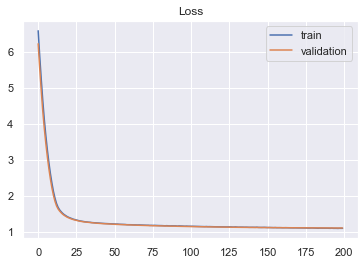

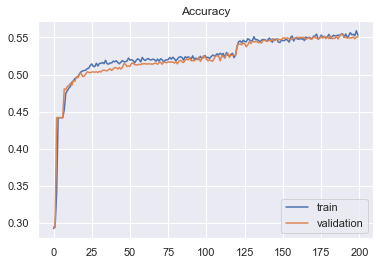

In [147]:
plt.title(f'Loss')
plt.plot(NN_model_hist.history['loss'], label='train')
plt.plot(NN_model_hist.history['val_loss'], label='validation')
plt.legend()
plt.show()
plt.title(f'Accuracy')
plt.plot(NN_model_hist.history['accuracy'], label='train')
plt.plot(NN_model_hist.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

### Model Evaluation



In [148]:
Evaluation_summary=pd.DataFrame()
print(f"Final training loss : {NN_model_hist.history['loss'][-1]}")
print(f"Final training accuracy:  {NN_model_hist.history['accuracy'][-1]}")
print(f"Final validation loss : {NN_model_hist.history['val_loss'][-1]}")
print(f"Final validation accuracy : {NN_model_hist.history['val_accuracy'][-1]}")
Evaluation_summary=Evaluation_summary.append(pd.DataFrame({ \
            'Train Loss':[NN_model_hist.history['loss'][-1]], 'Train Accuracy': [NN_model_hist.history['accuracy'][-1]], \
                'Validation Loss':[NN_model_hist.history['val_loss'][-1]], 'Validation Accuracy': [NN_model_hist.history['val_accuracy'][-1]]}), ignore_index=True)

testLoss, testAccuracy = NN_model.evaluate(X_test, y_test)

y_pred = NN_model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test_=np.argmax(y_test, axis=1)
cm=confusion_matrix(y_test_, y_pred)
print(f'Confusion matrix:')
print(cm)
print(f'Classification Report:')
clReport=classification_report(y_test_, y_pred)
print(clReport)

Final training loss : 1.0902372598648071
Final training accuracy:  0.5531617999076843
Final validation loss : 1.0990746021270752
Final validation accuracy : 0.5510734915733337
193/193 [==============================] - 1s 3ms/step - loss: 1.0991 - accuracy: 0.5511
Confusion matrix:
[[ 301   72    0   49    4]
 [ 180  156    0  179   23]
 [  57  101    0  386  111]
 [  19   59    0  723 1011]
 [   7   24    0  478 2208]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.71      0.61       426
           1       0.38      0.29      0.33       538
           2       0.00      0.00      0.00       655
           3       0.40      0.40      0.40      1812
           4       0.66      0.81      0.73      2717

    accuracy                           0.55      6148
   macro avg       0.39      0.44      0.41      6148
weighted avg       0.48      0.55      0.51      6148



Observation : This iteration improved the accuracy. Rating '3' is still an issue but have shown improvements.

#### Model Iteration #7
#### Dropout on the lower hidden layer and increasing learning rate.

In [154]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, input_dim = 128, activation='relu'))
# The Hidden Layer :
NN_model.add(Dense(256,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dropout(rate=0.6))
NN_model.add(Dense(128,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(64,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(32,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(32,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(16,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))

# The Output Layer :
NN_model.add(Dense(5, activation='softmax'))

print(NN_model.summary())

### Model Compilation

adam=Adam(learning_rate=0.00004)
NN_model.compile( optimizer = adam, loss = 'categorical_crossentropy', metrics=['accuracy'] )

### Model Training

start_=time.time()
print(f'Model training is started at {start_}')
NN_model_hist = NN_model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))
end_=time.time()
print(f'Model training is finished at {end_} & it took {round(end_-start_, 0)} sec')



Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_91 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_93 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_94 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_95 (Dense)             (None, 32)              

225/225 [==============================] - 3s 13ms/step - loss: 1.1374 - accuracy: 0.5449 - val_loss: 1.1353 - val_accuracy: 0.5369
Epoch 103/200
225/225 [==============================] - 3s 13ms/step - loss: 1.1385 - accuracy: 0.5435 - val_loss: 1.1336 - val_accuracy: 0.5402
Epoch 104/200
225/225 [==============================] - 3s 13ms/step - loss: 1.1368 - accuracy: 0.5414 - val_loss: 1.1332 - val_accuracy: 0.5395
Epoch 105/200
225/225 [==============================] - 3s 13ms/step - loss: 1.1317 - accuracy: 0.5447 - val_loss: 1.1324 - val_accuracy: 0.5385
Epoch 106/200
225/225 [==============================] - 3s 13ms/step - loss: 1.1361 - accuracy: 0.5425 - val_loss: 1.1318 - val_accuracy: 0.5394
Epoch 107/200
225/225 [==============================] - 3s 13ms/step - loss: 1.1337 - accuracy: 0.5424 - val_loss: 1.1308 - val_accuracy: 0.5444
Epoch 108/200
225/225 [==============================] - 3s 13ms/step - loss: 1.1328 - accuracy: 0.5464 - val_loss: 1.1302 - val_accuracy:

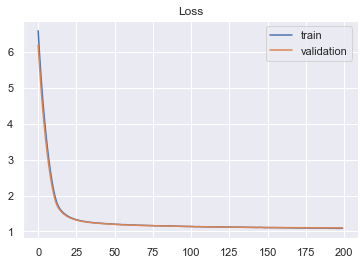

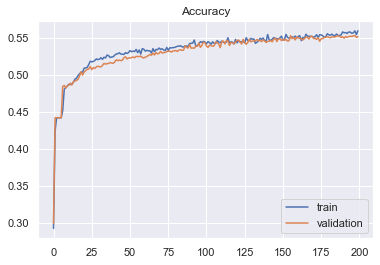

In [155]:
plt.title(f'Loss')
plt.plot(NN_model_hist.history['loss'], label='train')
plt.plot(NN_model_hist.history['val_loss'], label='validation')
plt.legend()
plt.show()
plt.title(f'Accuracy')
plt.plot(NN_model_hist.history['accuracy'], label='train')
plt.plot(NN_model_hist.history['val_accuracy'], label='validation')
plt.legend()
plt.show()



In [156]:
### Model Evaluation

Evaluation_summary=pd.DataFrame()
print(f"Final training loss : {NN_model_hist.history['loss'][-1]}")
print(f"Final training accuracy:  {NN_model_hist.history['accuracy'][-1]}")
print(f"Final validation loss : {NN_model_hist.history['val_loss'][-1]}")
print(f"Final validation accuracy : {NN_model_hist.history['val_accuracy'][-1]}")
Evaluation_summary=Evaluation_summary.append(pd.DataFrame({ \
            'Train Loss':[NN_model_hist.history['loss'][-1]], 'Train Accuracy': [NN_model_hist.history['accuracy'][-1]], \
                'Validation Loss':[NN_model_hist.history['val_loss'][-1]], 'Validation Accuracy': [NN_model_hist.history['val_accuracy'][-1]]}), ignore_index=True)

testLoss, testAccuracy = NN_model.evaluate(X_test, y_test)

y_pred = NN_model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test_=np.argmax(y_test, axis=1)
cm=confusion_matrix(y_test_, y_pred)
print(f'Confusion matrix:')
print(cm)
print(f'Classification Report:')
clReport=classification_report(y_test_, y_pred)
print(clReport)

Final training loss : 1.0854674577713013
Final training accuracy:  0.5596458315849304
Final validation loss : 1.0990360975265503
Final validation accuracy : 0.5517241358757019
  1/193 [..............................] - ETA: 0s - loss: 0.9879 - accuracy: 0.5938WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0156s). Check your callbacks.


193/193 [==============================] - 2s 9ms/step - loss: 1.0990 - accuracy: 0.5517
Confusion matrix:
[[ 303   76    0   43    4]
 [ 189  161    0  169   19]
 [  55  116    0  366  118]
 [  17   65    0  718 1012]
 [   7   27    0  473 2210]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.71      0.61       426
           1       0.36      0.30      0.33       538
           2       0.00      0.00      0.00       655
           3       0.41      0.40      0.40      1812
           4       0.66      0.81      0.73      2717

    accuracy                           0.55      6148
   macro avg       0.39      0.44      0.41      6148
weighted avg       0.48      0.55      0.51      6148



Observation: This model shows improved accuracy. Model validation is successful.

#### Model Iteration #8
#### Adding additional hidden layer

In [158]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, input_dim = 128, activation='relu'))
# The Hidden Layer :
NN_model.add(Dense(256,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dropout(rate=0.6))
NN_model.add(Dense(256,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dropout(rate=0.6))
NN_model.add(Dense(128,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(64,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(32,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(32,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(16,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))

# The Output Layer :
NN_model.add(Dense(5, activation='softmax'))

print(NN_model.summary())

### Model Compilation

adam=Adam(learning_rate=0.00004)
NN_model.compile( optimizer = adam, loss = 'categorical_crossentropy', metrics=['accuracy'] )

### Model Training

start_=time.time()
print(f'Model training is started at {start_}')
NN_model_hist = NN_model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))
end_=time.time()
print(f'Model training is finished at {end_} & it took {round(end_-start_, 0)} sec')


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_99 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_100 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_101 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_102 (Dense)            (None, 64)              

Epoch 45/200
225/225 [==============================] - 3s 15ms/step - loss: 1.2663 - accuracy: 0.5267 - val_loss: 1.2491 - val_accuracy: 0.5159
Epoch 46/200
225/225 [==============================] - 3s 14ms/step - loss: 1.2674 - accuracy: 0.5221 - val_loss: 1.2475 - val_accuracy: 0.5171
Epoch 47/200
225/225 [==============================] - 3s 14ms/step - loss: 1.2630 - accuracy: 0.5243 - val_loss: 1.2437 - val_accuracy: 0.5197
Epoch 48/200
225/225 [==============================] - 3s 14ms/step - loss: 1.2627 - accuracy: 0.5239 - val_loss: 1.2438 - val_accuracy: 0.5207
Epoch 49/200
225/225 [==============================] - 3s 14ms/step - loss: 1.2578 - accuracy: 0.5257 - val_loss: 1.2383 - val_accuracy: 0.5179
Epoch 50/200
225/225 [==============================] - 3s 13ms/step - loss: 1.2561 - accuracy: 0.5276 - val_loss: 1.2358 - val_accuracy: 0.5189
Epoch 51/200
225/225 [==============================] - 3s 14ms/step - loss: 1.2520 - accuracy: 0.5262 - val_loss: 1.2340 - val_ac

225/225 [==============================] - 3s 14ms/step - loss: 1.1607 - accuracy: 0.5396 - val_loss: 1.1432 - val_accuracy: 0.5420
Epoch 158/200
225/225 [==============================] - 3s 14ms/step - loss: 1.1554 - accuracy: 0.5431 - val_loss: 1.1425 - val_accuracy: 0.5423
Epoch 159/200
225/225 [==============================] - 3s 15ms/step - loss: 1.1576 - accuracy: 0.5431 - val_loss: 1.1425 - val_accuracy: 0.5421
Epoch 160/200
225/225 [==============================] - 3s 14ms/step - loss: 1.1532 - accuracy: 0.5433 - val_loss: 1.1419 - val_accuracy: 0.5444
Epoch 161/200
225/225 [==============================] - 3s 14ms/step - loss: 1.1531 - accuracy: 0.5430 - val_loss: 1.1419 - val_accuracy: 0.5441
Epoch 162/200
225/225 [==============================] - 3s 15ms/step - loss: 1.1552 - accuracy: 0.5378 - val_loss: 1.1408 - val_accuracy: 0.5436
Epoch 163/200
225/225 [==============================] - 3s 14ms/step - loss: 1.1521 - accuracy: 0.5396 - val_loss: 1.1407 - val_accuracy:

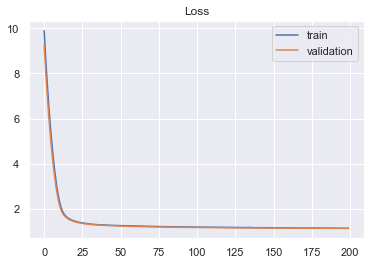

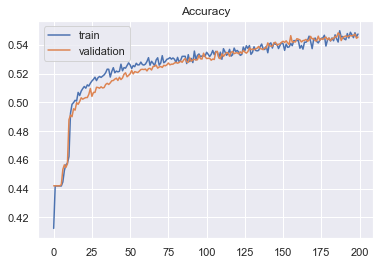

In [159]:
plt.title(f'Loss')
plt.plot(NN_model_hist.history['loss'], label='train')
plt.plot(NN_model_hist.history['val_loss'], label='validation')
plt.legend()
plt.show()
plt.title(f'Accuracy')
plt.plot(NN_model_hist.history['accuracy'], label='train')
plt.plot(NN_model_hist.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [160]:
### Model Evaluation

Evaluation_summary=pd.DataFrame()
print(f"Final training loss : {NN_model_hist.history['loss'][-1]}")
print(f"Final training accuracy:  {NN_model_hist.history['accuracy'][-1]}")
print(f"Final validation loss : {NN_model_hist.history['val_loss'][-1]}")
print(f"Final validation accuracy : {NN_model_hist.history['val_accuracy'][-1]}")
Evaluation_summary=Evaluation_summary.append(pd.DataFrame({ \
            'Train Loss':[NN_model_hist.history['loss'][-1]], 'Train Accuracy': [NN_model_hist.history['accuracy'][-1]], \
                'Validation Loss':[NN_model_hist.history['val_loss'][-1]], 'Validation Accuracy': [NN_model_hist.history['val_accuracy'][-1]]}), ignore_index=True)

testLoss, testAccuracy = NN_model.evaluate(X_test, y_test)

y_pred = NN_model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test_=np.argmax(y_test, axis=1)
cm=confusion_matrix(y_test_, y_pred)
print(f'Confusion matrix:')
print(cm)
print(f'Classification Report:')
clReport=classification_report(y_test_, y_pred)
print(clReport)

Final training loss : 1.1370534896850586
Final training accuracy:  0.5476539134979248
Final validation loss : 1.133288860321045
Final validation accuracy : 0.5455432534217834
  1/193 [..............................] - ETA: 0s - loss: 1.0208 - accuracy: 0.5938WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0157s). Check your callbacks.


193/193 [==============================] - 1s 7ms/step - loss: 1.1333 - accuracy: 0.5455
Confusion matrix:
[[ 301   66    0   54    5]
 [ 183  135    0  194   26]
 [  60   86    0  358  151]
 [  20   59    0  625 1108]
 [   9   18    0  397 2293]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.71      0.60       426
           1       0.37      0.25      0.30       538
           2       0.00      0.00      0.00       655
           3       0.38      0.34      0.36      1812
           4       0.64      0.84      0.73      2717

    accuracy                           0.55      6148
   macro avg       0.38      0.43      0.40      6148
weighted avg       0.46      0.55      0.50      6148



Observation: Accuracy reduced marginally in this iteration. Issue with rating '3' re-occured. Adding a hidden layer had adverse impact on the model.

### <b> Hyper Parameter Tuning using Keras Tuner to find optimal number of layers, number of neuron in each layer & learning rate. </b>

In [124]:
from kerastuner.tuners import RandomSearch
def create_model(hp):
    model = Sequential()
    # The Input Layer :
    model.add(Dense(128, input_dim = 128, activation='relu'))
    for i in range(hp.Int('num_layers', 5, 8)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=16,
                                            max_value=256,
                                            step=32),
                               activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
    model.add(Dense(5, activation='softmax'))
    model.compile(
        optimizer=Adam(
            hp.Choice('learning_rate', [0.0001, 0.0002])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [125]:
tuner = RandomSearch(
    create_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='HPOptimization',
    project_name='Trip Advisor Sentiment')

tuner.search_space_summary()

Search space summary
Default search space size: 7
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 8, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 32, 'sampling': None}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 0.0002], 'ordered': True}


In [126]:
tuner.search(X_train, y_train,
             epochs=200, batch_size=64,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 18m 40s]
val_accuracy: 0.5571459531784058

Best val_accuracy So Far: 0.56023641427358
Total elapsed time: 01h 33m 43s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [127]:
tuner.results_summary()

Results summary
Results in HPOptimization\Trip Advisor Sentiment
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 6
units_0: 48
units_1: 16
units_2: 176
units_3: 144
units_4: 112
learning_rate: 0.0002
units_5: 144
units_6: 144
units_7: 112
Score: 0.56023641427358
Trial summary
Hyperparameters:
num_layers: 6
units_0: 240
units_1: 112
units_2: 112
units_3: 112
units_4: 48
learning_rate: 0.0001
units_5: 16
units_6: 176
Score: 0.5596399903297424
Trial summary
Hyperparameters:
num_layers: 7
units_0: 240
units_1: 112
units_2: 144
units_3: 144
units_4: 16
learning_rate: 0.0001
units_5: 208
units_6: 144
units_7: 16
Score: 0.5571459531784058
Trial summary
Hyperparameters:
num_layers: 7
units_0: 208
units_1: 176
units_2: 80
units_3: 240
units_4: 112
learning_rate: 0.0002
units_5: 16
units_6: 16
Score: 0.48080676794052124
Trial summary
Hyperparameters:
num_layers: 8
units_0: 240
units_1: 240
units_2: 240
units_3: 176
units_4: 208
le

In [128]:
tuner.get_best_models

<bound method Tuner.get_best_models of <keras_tuner.tuners.randomsearch.RandomSearch object at 0x00000204F340E3C8>>

In [164]:
best_model = tuner.get_best_models()[0]
best_model.build(X_train.shape)
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 48)                6192      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                784       
_________________________________________________________________
dense_3 (Dense)              (None, 176)               2992      
_________________________________________________________________
dense_4 (Dense)              (None, 144)               25488     
_________________________________________________________________
dense_5 (Dense)              (None, 112)               16240     
_________________________________________________________________
dense_6 (Dense)              (None, 144)               1

Observation: Accuracy of best model based on keras tuner with provided set of hyper parameter is 0.56. Model 8 shows similar performance and accuracy. We can further optimize this by providing different set of hyperparameters given more time and larger set of data

### Final Observations

<li> Learning Rate: The learning rate was varied between 0.0001 to 0.000025. It was observed that the model performed well at 0.00004.
<li> Regularization: Removing regularization, the model is failing while validation.
<li> Dropout: The drop out at earlier hidden layer has better impact on the model. The dropout rate performs better at 0.6
<li> Hidden Layers: Increasing hidden layers from 6 to 7 did not improve the model. Thus additional hidden layers may not improve model.
<li> Model Iteration #8 performed the best and its accuracy is 0.55 for validation.
    
